## Exploratory Data Analysis-A CaseStudy
Analyzing responses  from the stack overflow Anual Developer Survey 2020

In [1]:
import opendatasets as od

In [2]:
od.download('stackoverflow-developer-survey-2020')

0it [00:00, ?it/s]

100%|████████████████████████████████████████████████████████████████▉| 94445568/94603888 [02:13<00:00, 1590464.83it/s]
0it [00:00, ?it/s]


16384it [00:00, 26762.98it/s]                                                                                          

0it [00:00, ?it/s]


8192it [00:00, 14810.13it/s]                                                                                           
94609408it [02:30, 1590464.83it/s]                                                                                     

In [2]:
import os

In [3]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

It seems like the dataset contains three files:

**README.txt** - Information about the dataset

**survey_results_schema.csv** - The list of questions, and shortcodes for each question

**survey_results_public.csv** - The full list of responses to the questions

Let's load the CSV files using the Pandas library. We'll use the name **survey_raw_df** for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [4]:
import pandas as pd

In [5]:
survey_raw_df=pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [6]:
print(f"The dataset consists of {survey_raw_df.shape[0]} and {survey_raw_df.shape[1]} columns")

The dataset consists of 64461 and 61 columns


In [7]:
survey_raw_df.head(5)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


Lets view the list of columns in the dataframe

In [8]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It appears that shortcuts for questions have been used as column names.
We can refer to the __schema file__ to see the full text for each question

In [9]:
schema_raw=pd.read_csv('stackoverflow-developer-survey-2020/survey_results_schema.csv',index_col='Column').QuestionText

In [10]:
schema_raw['Respondent']

'Randomized respondent ID number (not in order of survey response time)'

We can use schema_raw to retrive the full question text for any column in survey_raw_df

We have now loaded the dataset.Now we can perform data preprocesing & cleaning the data for our analysis

## Data Preprocesing & Cleaning

While the survey responses contain a wealth of information,we'll limit our analysis to the following areas:

Demographics of the survey respondents

Distribution of programming skills,experience, and preferences

Employment related information,preferences, and opinions

We'll select the subset of columns with relevant data for analysis

In [11]:
selected_columns=[
    #demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    #Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    #employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

Lets extract the copy of the data from these columns into a new dataframe survey_df

In [12]:
survey_df=survey_raw_df[selected_columns].copy()

In [13]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


Lets view some basic information about the data frame

In [14]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most of the column has the datatype as objects and the non null count of each column is less than 64461 which seems that every column consists of NaN values .We'll need to deal with the empty values and manually adjust the data type for ach column on a case-by-case basis.

Only two columns are detected as numeric columns(Age,WorkWeekHrs).There are other numeric columns as well like Age1stCode,YearsCode,YearsCodePro so inorder to make analysis easier we will covert them into numeric data types.

In [15]:
survey_df['YearsCode']=pd.to_numeric(survey_df.YearsCode,errors='coerce')
survey_df['YearsCodePro']=pd.to_numeric(survey_df.YearsCodePro,errors='coerce')
survey_df['Age1stCode']=pd.to_numeric(survey_df.Age1stCode,errors='coerce')

Lets now view some basic statics about numeric columns

In [16]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column since the min value is 1 year and maximum is 279 which is imposible for a 1 year old kid and 279 year old to take a survey.A simple fix for this would be to ingore rows where the age is less than 10 and greater than 100.  

In [17]:
survey_df.drop(survey_df[survey_df.Age<10].index,inplace=True)
survey_df.drop(survey_df[survey_df.Age>100].index,inplace=True)

The same holds for the WorkWeekHrs.Lets ignore entries where the value for the column is higher than 140 hours(~20 hours per day).

In [18]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index,inplace=True)

In [19]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

It seems that gender column also allows to pick multiple options.we'll remove values containing more than one option to simplify our analysis

In [20]:
import numpy as np

In [21]:
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.nan,inplace=True)

Now we have cleaned and preprocessed the data set for analysis.Lets look at the sample of rows from the dataframe

In [22]:
survey_df.sample(5)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
5232,Bangladesh,21.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,4.0,NaN,C;C++;HTML/CSS;Java;JavaScript;Python;R;SQL,C++;Dart;Go;HTML/CSS;Java;JavaScript;Python;Ru...,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,"Not employed, but looking for work","Developer, back-end;Developer, front-end;Devel...",NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,NaN
42049,United States,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,24.0,20.0,C#;JavaScript;SQL;TypeScript,C#;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",43.0,Very dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Critically important
54474,Romania,31.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,11.0,15.0,9.0,C;C++;HTML/CSS;Java;JavaScript;SQL;TypeScript,C;C#;C++;HTML/CSS;Java;JavaScript;Python;Scala...,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, embedded applications or devices;De...",40.0,Very dissatisfied,How widely used or impactful my work output wo...,Occasionally: 1-2 days per quarter but less th...,Very important
39924,United States,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
52765,United Kingdom,29.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,15.0,6.0,Java;SQL;TypeScript,Java;Python,Once every few years,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end",9.0,Slightly satisfied,Specific department or team I’d be working on;...,Often: 1-2 days per week or more,Critically important


## Exploratory analysis and visualization

Before we ask questions about the survey responses,it would help to understand the respondents demographics i.e,country,age,employment level,education level,etc.Its essential to explore these variables to understand how represenatative the survey is of the worldwide programming comunity

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## Country

Lets look the number of countries from which there are responses in the survey and plot theten countrieswith highest number of responses

In [24]:
schema_raw['Country']

'Where do you live?'

In [25]:
survey_df.Country.nunique()

183

In [26]:
top_countries=survey_df.Country.value_counts().head(10)

In [27]:
top_countries

United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64

We can visualize this information with the help of bar graph

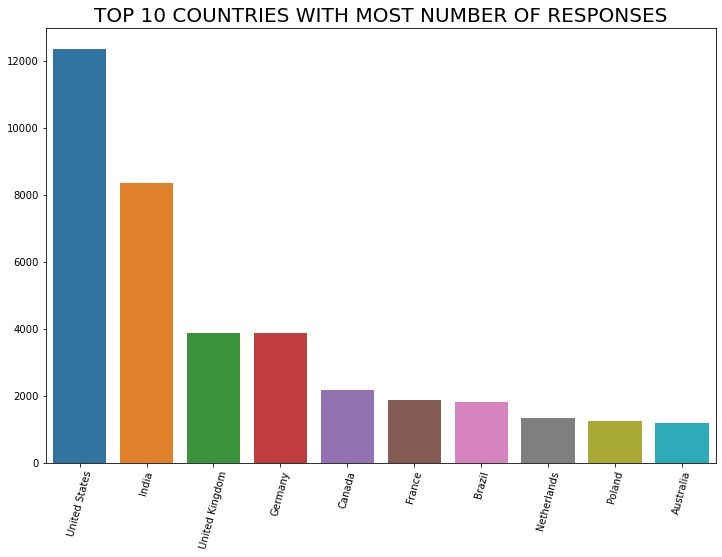

In [28]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=75)
plt.title("TOP 10 COUNTRIES WITH MOST NUMBER OF RESPONSES",fontsize=20)
sns.barplot(x=top_countries.index,y=top_countries.values)

It apears that high number of respondants are from us and india probably because the survey is in english as us and india have highest english speaking populations.we can already see that the survey maynot be representative of global programming community-especially from non english speaking countries.

## Age
The distribution of respondents age is another crucial factor to look at.We can use a histogram to visualize it

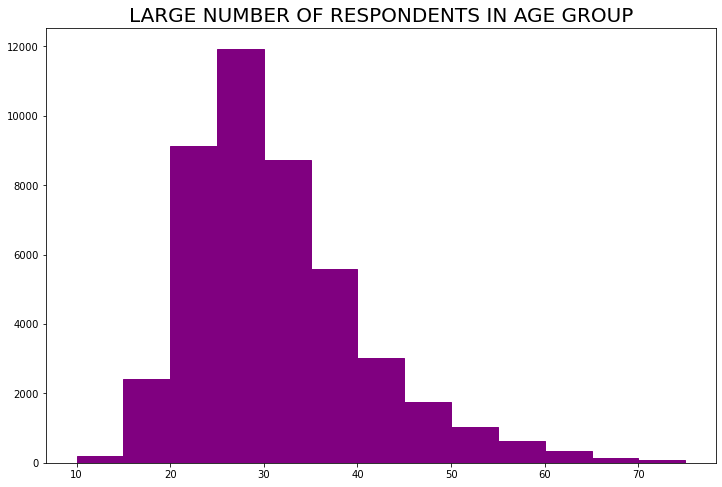

In [29]:
plt.figure(figsize=(12,8))
plt.title('LARGE NUMBER OF RESPONDENTS IN AGE GROUP',fontsize=20)
plt.hist(survey_df.Age,bins=np.arange(10,80,5),COLOR='purple')
plt.show()



It apears that large number of respondents are 20-40 year old.

## Gender
Lets look at the distribution of responses for the Gender.Its a well known fact that women and non-binary genders are underepresented in the programming community,so we might expect a skewed distribution here.

In [228]:
schema_raw.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

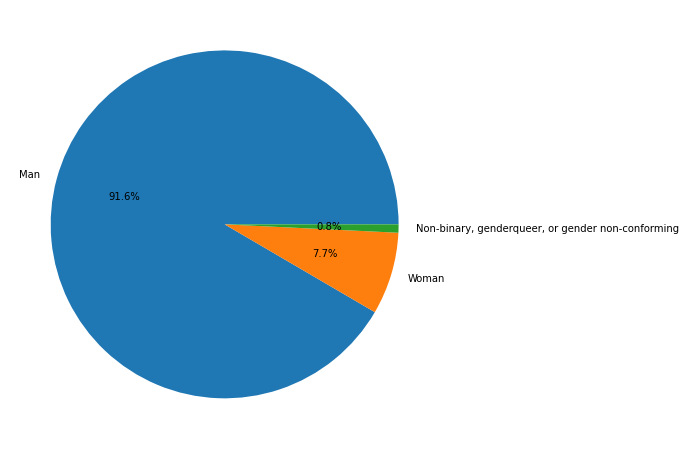

In [237]:
plt.figure(figsize=(12,8))
gender_counts=survey_df.Gender.value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%');

A pie chart would be great to visualize the distribution

only about 8% of survey respondents who have aswered the question identify as women and non binary. 

## Education level

Formal education in computer science is often considered as an  essential requirment for programming .However there are many tutorials and resources are available online to learn programming.Lets compare the respondents educational levels to gain some insights into this

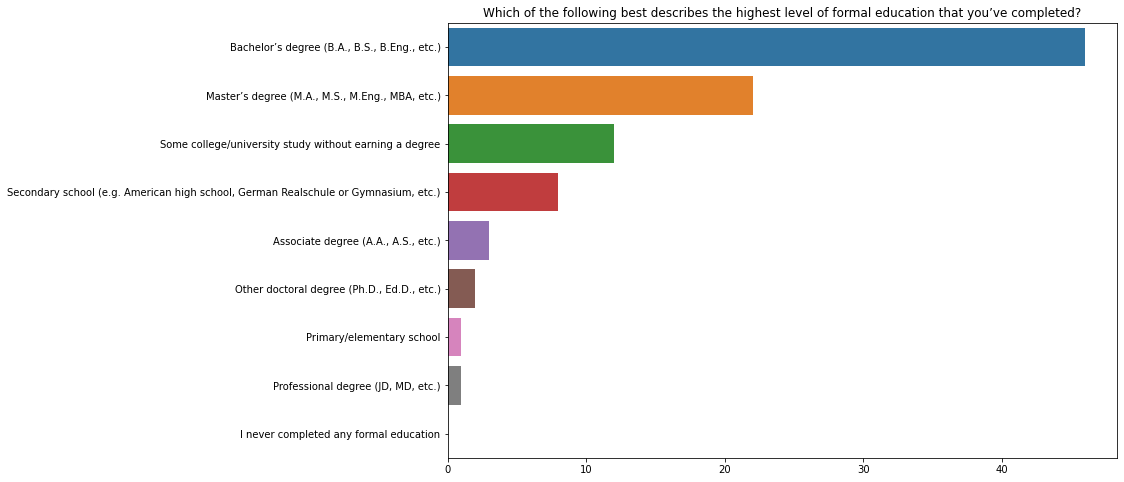

In [99]:
ed_per=survey_df.EdLevel.value_counts()*100//survey_df.EdLevel.count()
plt.figure(figsize=(12,8))
plt.title(schema_raw.EdLevel)
sns.barplot(x=ed_per.values,y=ed_per.index)

It appears that nearly 50% of survey respondents holds a Bachelors degree and nearly 22% of them holds a masters degree,so most of the programmers seems to have a collage eduaction.Howver this is not clear from the graph that they hold a degree in computer science

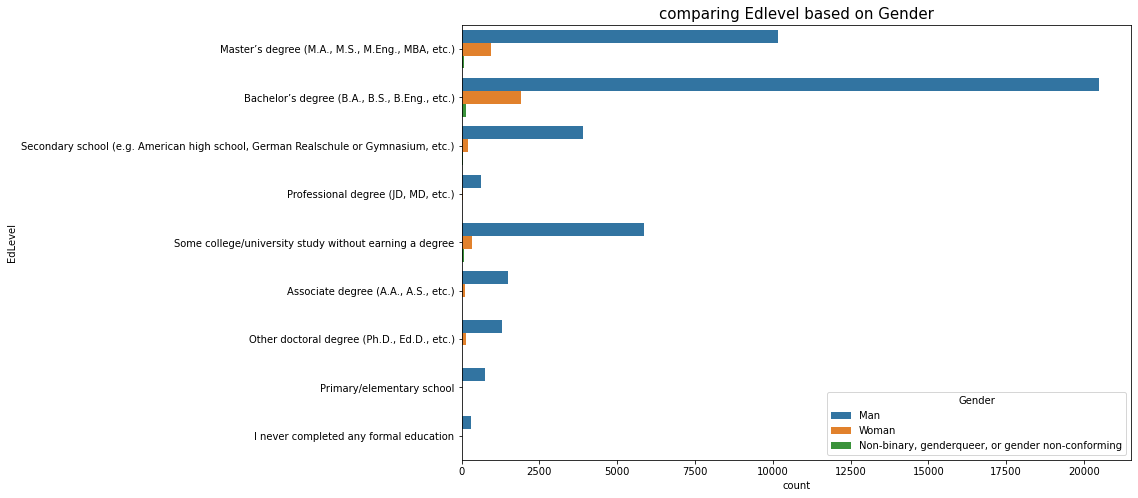

In [110]:
plt.figure(figsize=(12,8))
sns.countplot(y='EdLevel',data=survey_df,hue='Gender')
plt.title('comparing Edlevel based on Gender',fontsize=15)
plt.show()

It appears that there are more number of men holding a Master's Degree and Bachelors Degree than compared to women

Lets also plot undergraduate majors 

In [111]:
schema_raw.UndergradMajor

'What was your primary field of study?'

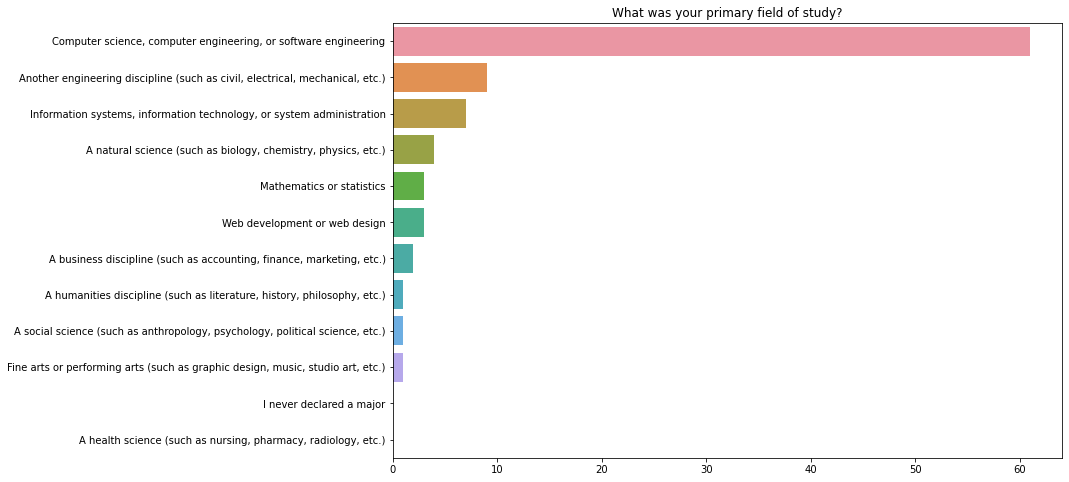

In [115]:
undergrad_per=survey_df.UndergradMajor.value_counts()*100//survey_df.UndergradMajor.count()
plt.figure(figsize=(12,8))
plt.title(schema_raw.UndergradMajor)
sns.barplot(x=undergrad_per.values,y=undergrad_per.index)
plt.show()

It seems that around 60% of programmers are holding a college degree in computers and software engineering,and around 40% are holding a degree other than computers are also into programming which is a very encouraging 

## Employment

Freelancing or contract work is a common choice among programmers,so it would be intresting to compare the breakdown between fulltime,part time and freelance works.Let's visualize the data from the employmentu column.

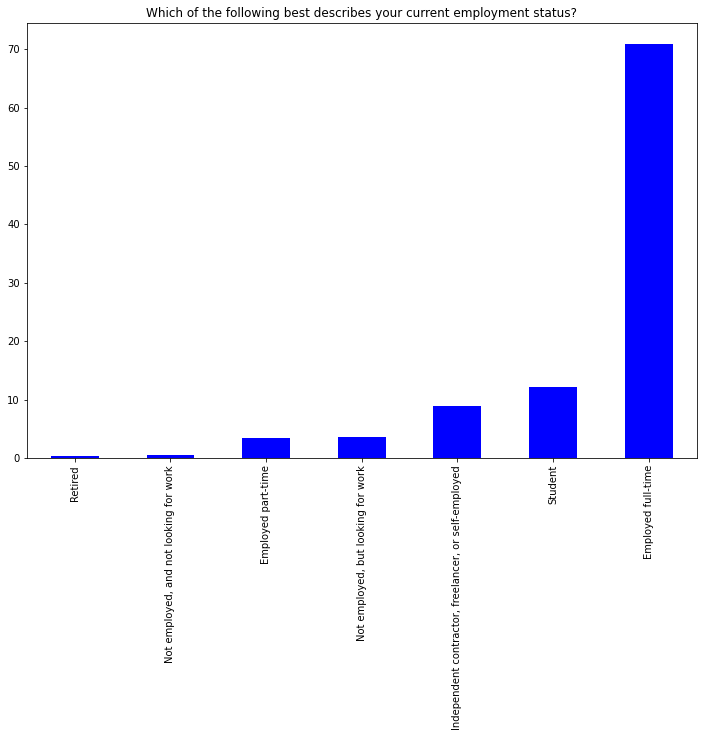

In [120]:
plt.figure(figsize=(12,8))
plt.title(schema_raw.Employment)
(survey_df.Employment.value_counts(normalize=True,ascending=True)*100).plot(kind='bar',color='b')
plt.show()

It appears that close to 10% of respondents are employed part time or as freelancers.


## Asking and Answering Questions

We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset.Let's ask some specific questions and try to answer them using dataframe operations and visualizations

### Q:What are the most popular programming languages in 2020?

To answer,this we can use the LanguageWorkedWith column.Similar to DevType,respondents were allowed to choose multiple options here.

In [121]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

First,we'll split thiscolumn into a dataframe containing a column of each language listed in options.

In [126]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [128]:
languages_worked_df=split_multicolumn(survey_df.LanguageWorkedWith)

In [138]:
languages_per=languages_worked_df.sum()*100//languages_worked_df.count()

In [141]:
l_df=languages_per.sort_values(ascending=False)

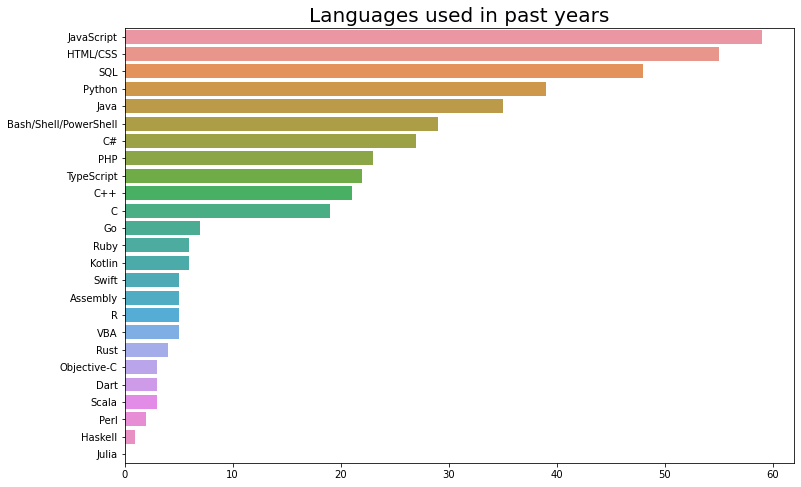

In [143]:
plt.figure(figsize=(12,8))
plt.title("Languages used in past years",fontsize=20)
sns.barplot(x=l_df.values,y=l_df.index)

Perhaps unsurprisingly JavaScript &Html/Css comes out at the top as web development is one of the today's most sought skills.It also happens to be one of easiest to get started.Sql is ment to be used for working with relational databases so its no suprise that most of the programmers work with sql.Python seems to be the popular choice for other formsof development beating out java.


### Q:What are the most common languages used by students ?compare with most common languages used by professionals

In [161]:
sdf=survey_df[survey_df['Employment']=='Student']
pdf=survey_df[survey_df['Employment']=='Employed full-time']

In [163]:
student_language_df=split_multicolumn(sdf.LanguageWorkedWith)
professional_language_df=split_multicolumn(pdf.LanguageWorkedWith)

In [170]:
student_lang_per=(student_language_df.sum()*100//student_language_df.count()).sort_values(ascending=False)
professional_lang_per=(professional_language_df.sum()*100//professional_language_df.count()).sort_values(ascending=False)

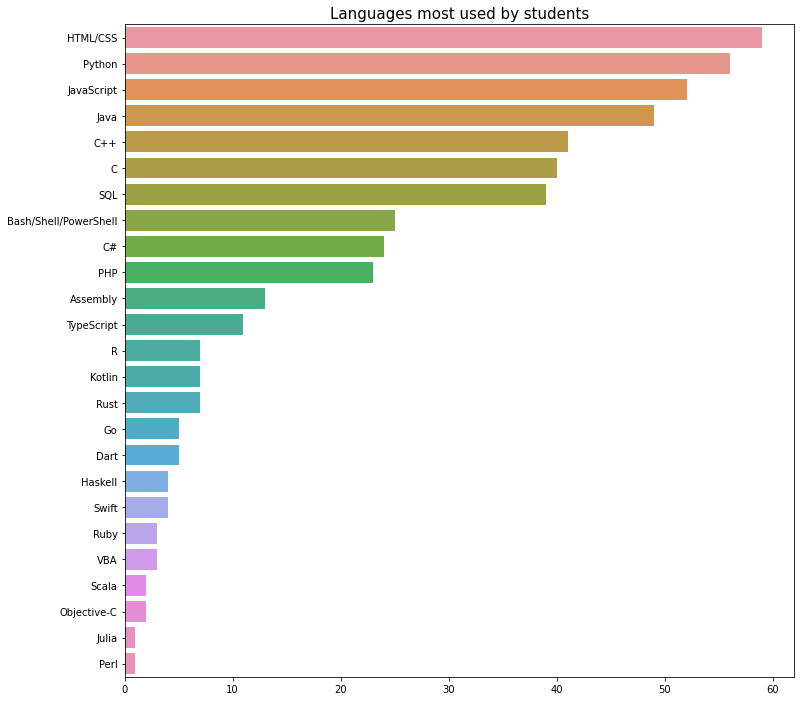

In [173]:
plt.figure(figsize=(12,12))
plt.title('Languages most used by students',fontsize=15)
sns.barplot(x=student_lang_per.values,y=student_lang_per.index)
plt.show()

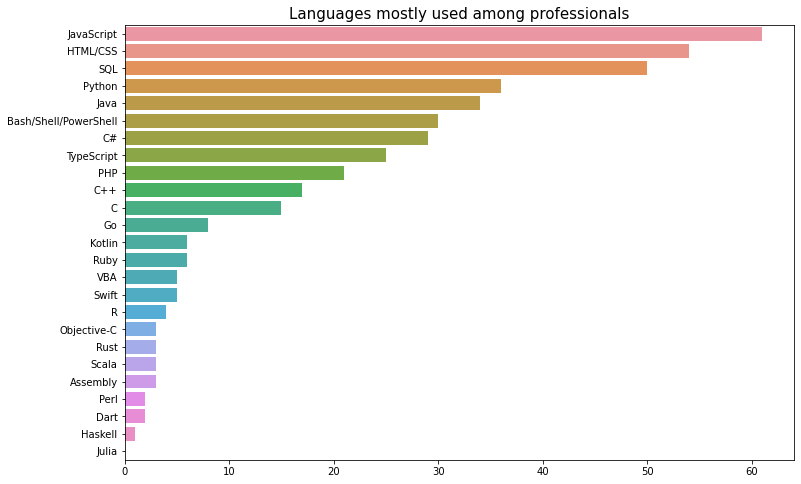

In [188]:
plt.figure(figsize=(12,8))
plt.title('Languages mostly used among professionals',fontsize=15)
sns.barplot(x=professional_lang_per.values,y=professional_lang_per.index)
plt.show()

HTML&CSS,Python and Java script are the most used languages among students as well as with professionals,but professionals are using Sql which is not mostly been used by the students.

### Q:Which languages are most people intrested to learn over next year?

In [196]:
languages_intrested_df=split_multicolumn(survey_df.LanguageDesireNextYear)
languages_intrested_per=languages_intrested_df.mean().sort_values(ascending=False)*100

In [197]:
languages_intrested_per

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

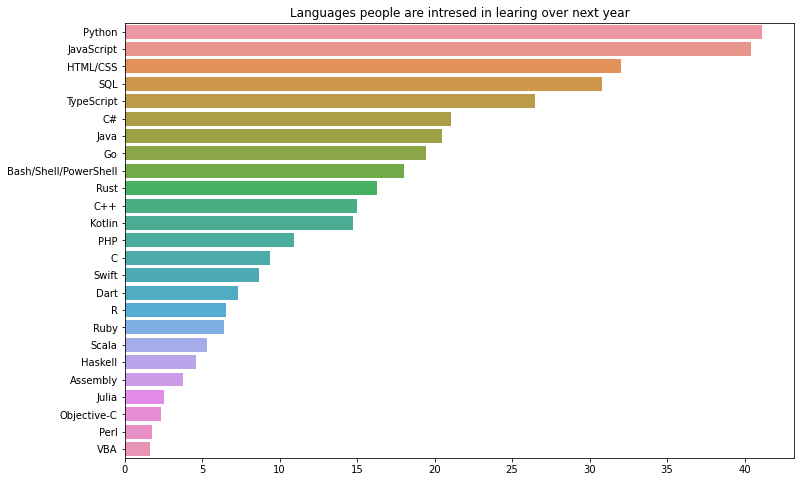

In [198]:
plt.figure(figsize=(12,8))
plt.title('Languages people are intresed in learing over next year')
sns.barplot(x=languages_intrested_per.values,y=languages_intrested_per.index)

Python seems to be the language in which most of the survey respondents are intrested in ,because it is easy to learn and a general purpose programming language which is used for variety of domains.

### Q: Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

In [200]:
languages_loved_df = languages_worked_df & languages_intrested_df
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

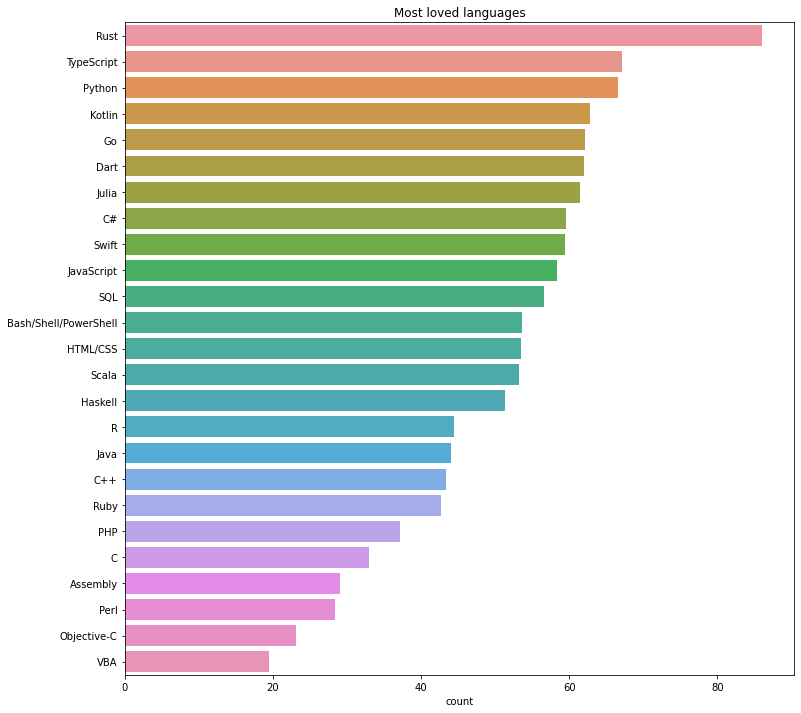

In [201]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

Rust has been StackOverflow's most-loved language for four years in a row. The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.

### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [205]:
countries_df=survey_df.groupby('Country')['WorkWeekHrs'].mean()

In [206]:
countries_df

Country
Afghanistan                             46.500000
Albania                                 43.962963
Algeria                                 36.862069
Andorra                                 42.000000
Angola                                  24.500000
                                          ...    
Venezuela, Bolivarian Republic of...    40.125000
Viet Nam                                41.391667
Yemen                                   40.000000
Zambia                                  38.000000
Zimbabwe                                39.928571
Name: WorkWeekHrs, Length: 183, dtype: float64

In [207]:
high_response_countries_df=countries_df.loc[survey_df.Country.value_counts()>250].head(15)

In [209]:
high_response_countries_df

Country
Argentina         37.911765
Australia         39.828234
Austria           37.167209
Bangladesh        40.097458
Belgium           40.444444
Brazil            38.409921
Bulgaria          39.509091
Canada            40.208837
China             42.150000
Colombia          39.043716
Czech Republic    39.288571
Denmark           36.956679
Egypt             39.653153
Finland           37.836089
France            38.949504
Name: WorkWeekHrs, dtype: float64

China,have the highest working hours,However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.

### Q: How important is it to start young to build a career in programming? 

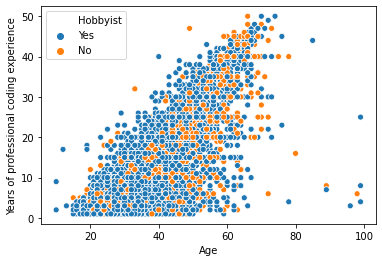

In [211]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

You can see points all over the graph, which indicates that you can start programming professionally at any age. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

We can also view the distribution of the Age1stCode column to see when the respondents tried programming for the first time.

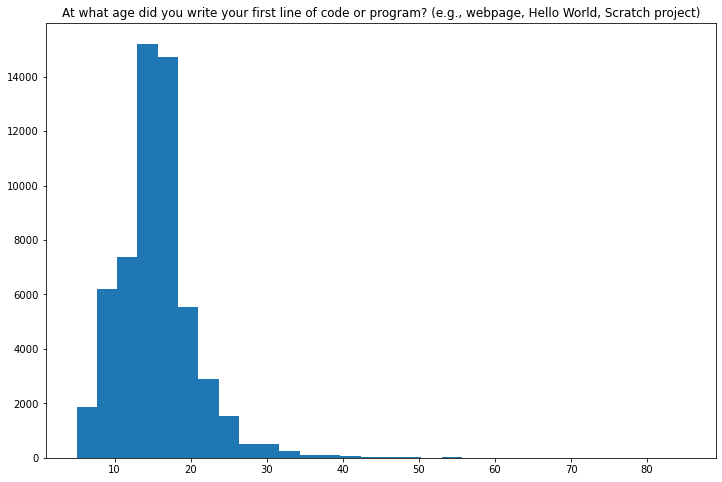

In [221]:
plt.figure(figsize=(12,8))
plt.title(schema_raw.Age1stCode)
plt.hist(x=survey_df.Age1stCode,bins=30)
plt.show()

As you might expect, most people seem to have had some exposure to programming before the age of 40. However, but there are people of all ages and walks of life learning to code.

### Inferences and Conclusions
We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.

- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.